In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from tabulate import tabulate
from scipy.stats import chi2_contingency 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from math import log2
import csv
import os
import random

dataset = pd.read_csv("dataset.csv")

%matplotlib notebook
%matplotlib inline

In [2]:
print(dataset.shape)
# dataset.head()
# print(dataset.info())
# print(dataset.describe())
# print(dataset['Administrative_Duration'].value_counts())
print(dataset['Administrative_Duration'].info())
# dataset['Administrative_Duration'].value_counts().plot.bar()

(12330, 18)
<class 'pandas.core.series.Series'>
RangeIndex: 12330 entries, 0 to 12329
Series name: Administrative_Duration
Non-Null Count  Dtype  
--------------  -----  
12330 non-null  float64
dtypes: float64(1)
memory usage: 96.5 KB
None


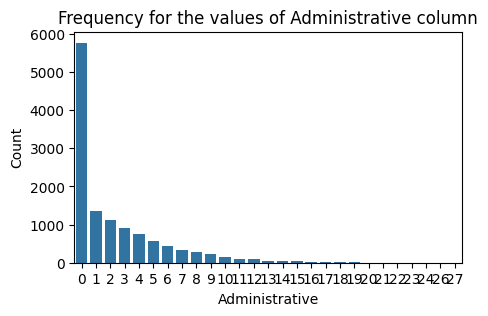

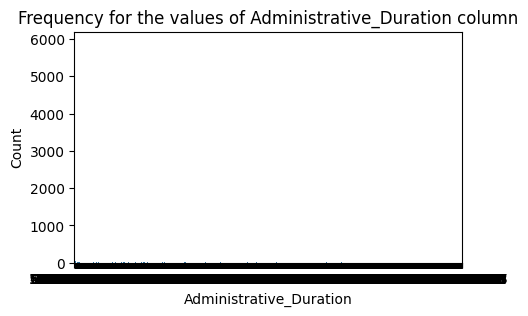

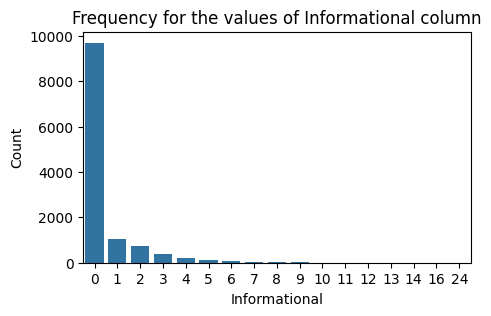

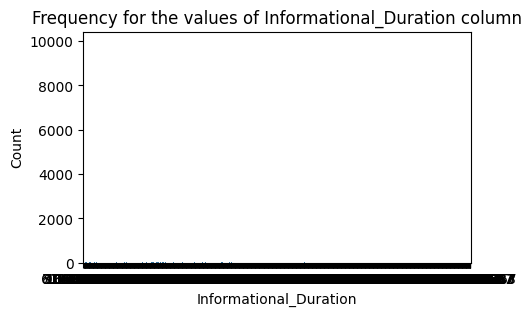

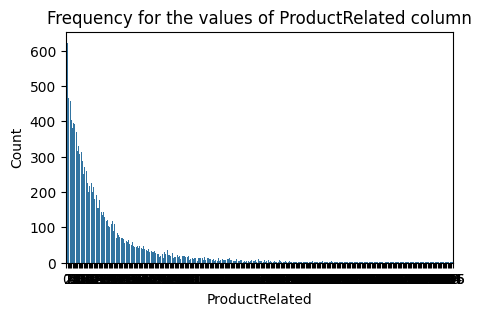

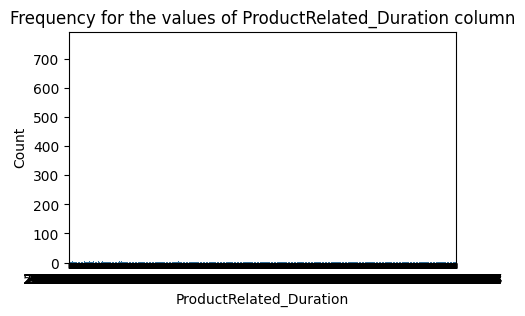

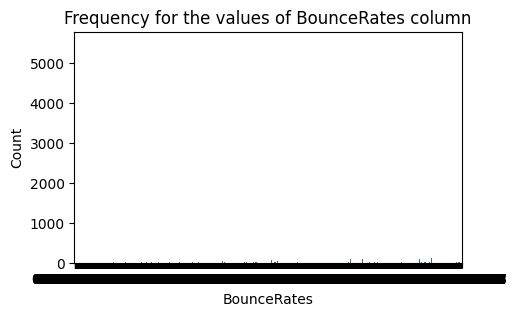

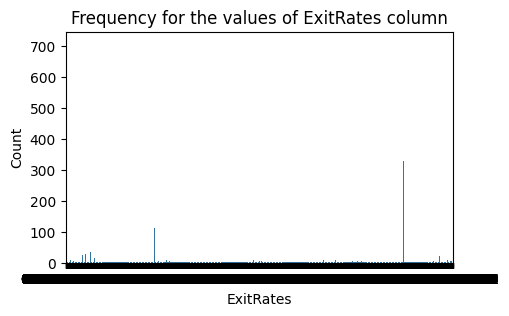

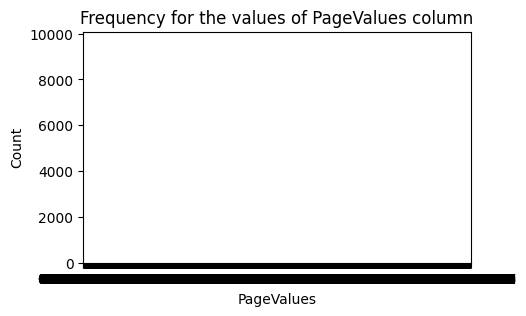

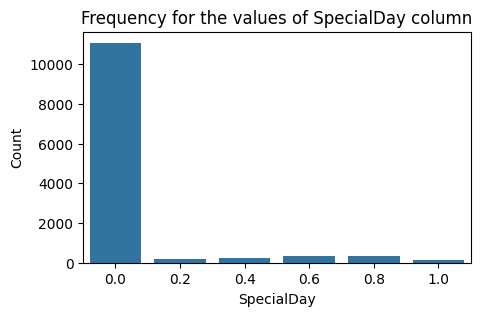

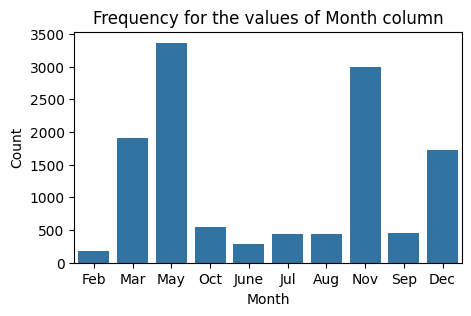

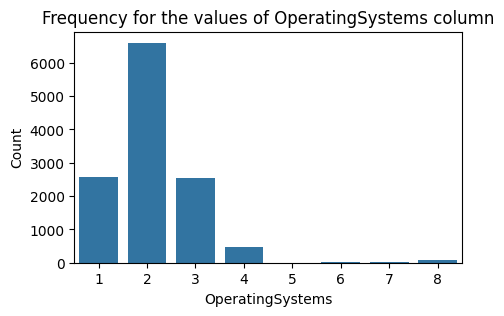

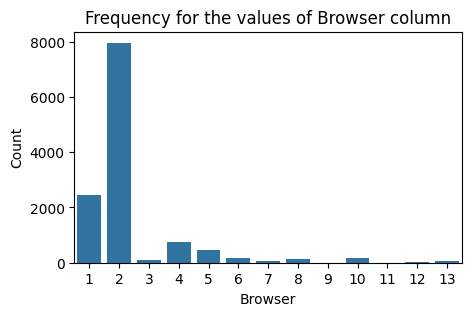

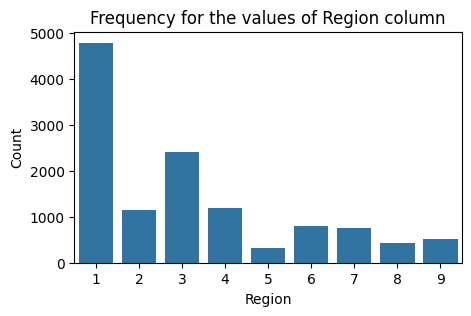

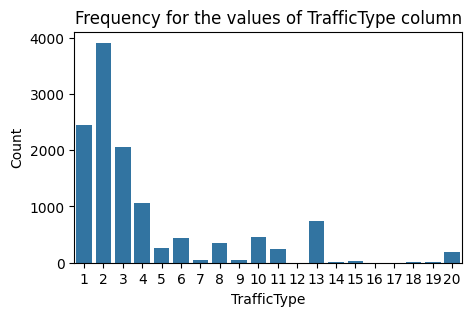

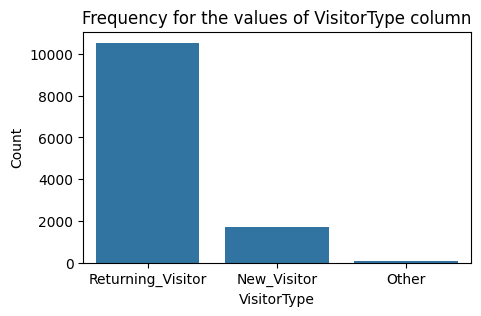

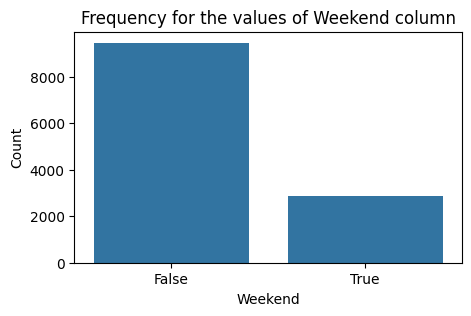

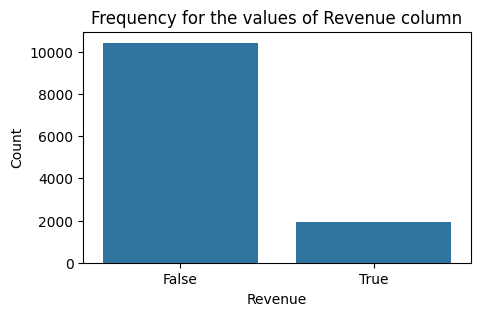

In [3]:
# dataset['Administrative'].value_counts().plot.bar()
# sns.countplot(x='Administrative', data=dataset)

for col in dataset.columns:
    plt.figure(figsize=(5, 3))
    plt.ylabel('Count')
    plt.title(f"Frequency for the values of {col} column")
    sns.countplot(x=col, data=dataset)
    plt.show()
    

[(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]
col: Administrative -> type: int64
[0, 0, 0, 0, 5768, 1354, 1114, 915, 1772, 1406]


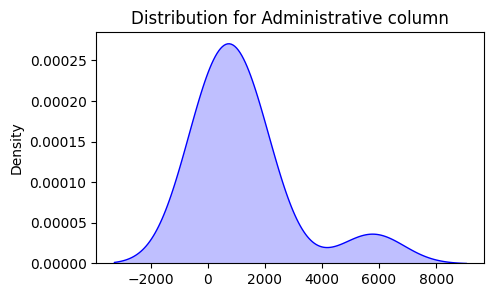

col: Administrative_Duration -> type: float64
[0, 0, 0, 0, 6164, 1222, 1244, 1233, 1234, 1232]


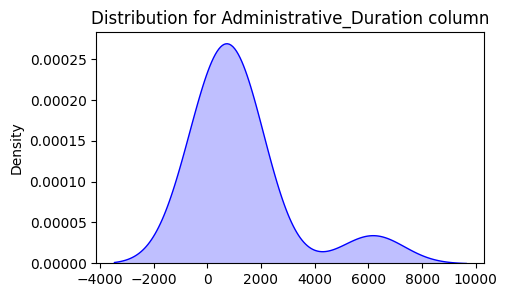

col: Informational -> type: int64
[0, 0, 0, 0, 0, 0, 0, 9699, 1041, 1589]


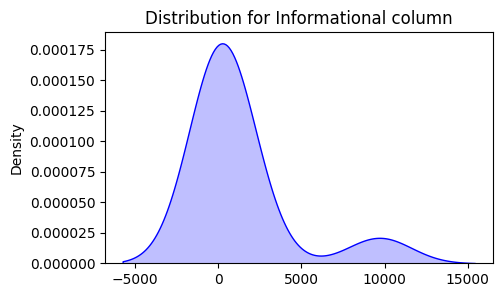

col: Informational_Duration -> type: float64
[0, 0, 0, 0, 0, 0, 0, 0, 11095, 1234]


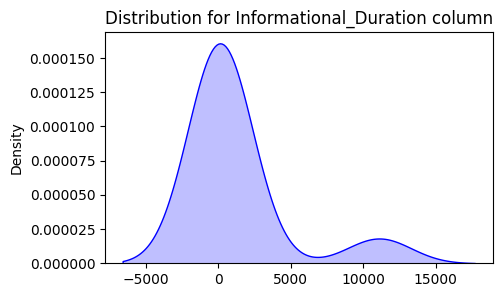

col: ProductRelated -> type: int64
[1125, 1244, 1157, 1268, 1296, 1235, 1227, 1245, 1293, 1239]


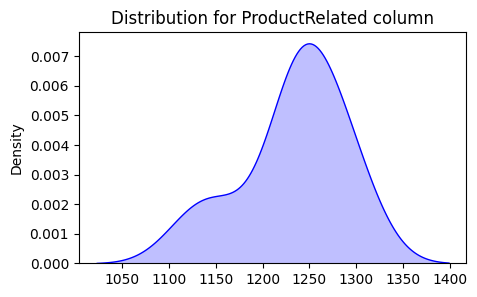

col: ProductRelated_Duration -> type: float64
[1231, 1231, 1237, 1233, 1233, 1232, 1234, 1233, 1233, 1232]


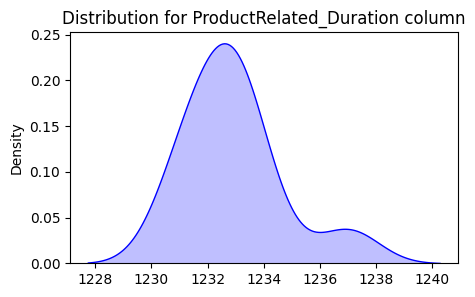

col: BounceRates -> type: float64
[0, 0, 0, 0, 6165, 1215, 1251, 1230, 1236, 533]


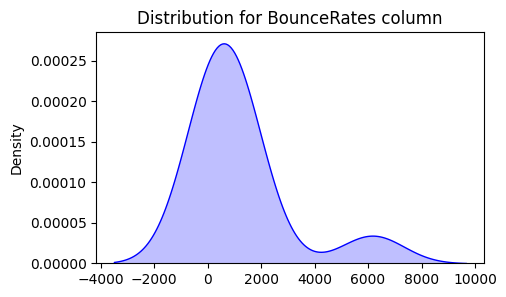

col: ExitRates -> type: float64
[1233, 1233, 1231, 1226, 1242, 1233, 1230, 1225, 1027, 740]


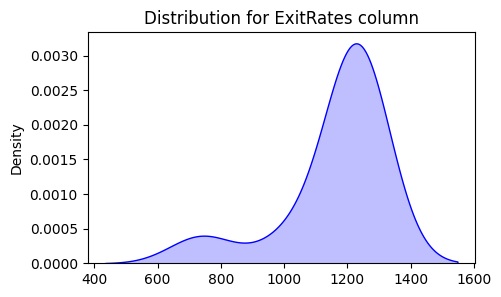

col: PageValues -> type: float64
[0, 0, 0, 0, 0, 0, 0, 9864, 1233, 1232]


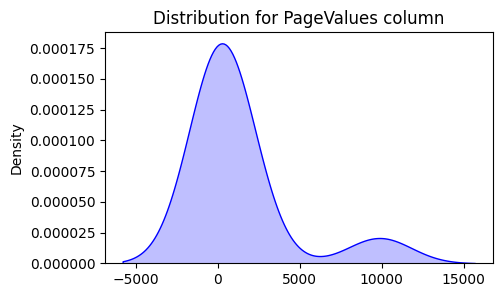

col: SpecialDay -> type: float64
[0, 0, 0, 0, 0, 0, 0, 0, 11079, 1097]


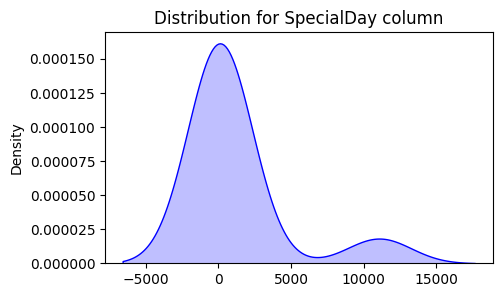

col: OperatingSystems -> type: int64
[0, 0, 2585, 0, 0, 0, 0, 6601, 0, 3065]


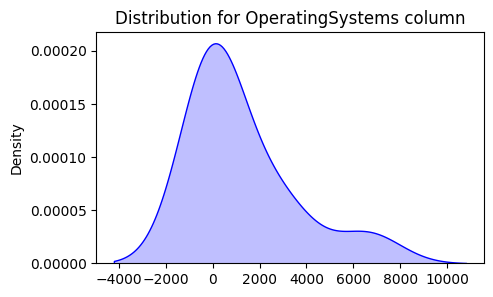

col: Browser -> type: int64
[0, 2462, 0, 0, 0, 0, 0, 0, 8066, 1741]


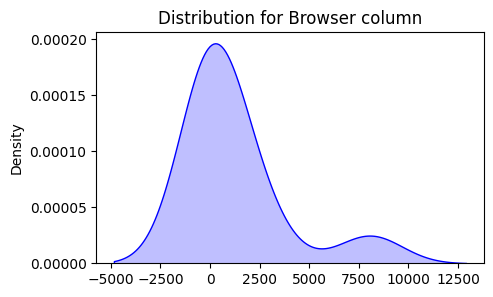

col: Region -> type: int64
[0, 0, 0, 4780, 1136, 0, 2403, 1500, 805, 1195]


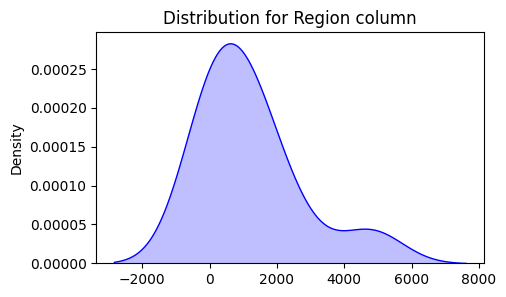

col: TrafficType -> type: int64
[0, 2451, 0, 0, 0, 3913, 2052, 1329, 1319, 1068]


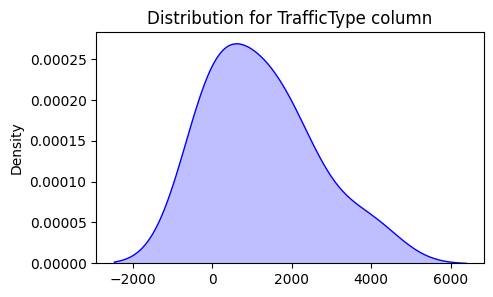

In [4]:
# print(np.arange(10, 110, 10))
percentile_ranges = []
for i in range(10):
    percentile_ranges.append((i*10, (i+1)*10))

print(percentile_ranges)

for col in dataset.columns:
    if(np.issubdtype(dataset[col].dtype, np.number)):
        plt.figure(figsize=(5, 3))
        plt.title(f"Distribution for {col} column")
        print(f"col: {col} -> type: {dataset[col].dtype}")
        # x = dataset[col].min()
        # y = ((dataset[col].max()-dataset[col].min())*i)/10
        # i+=1
        # filtered_df = dataset[(dataset[col] >= x) & (dataset[col] <= y)]
        counts = [np.sum((dataset[col] >= np.percentile(dataset[col], low)) & (dataset[col] < np.percentile(dataset[col], high))) for low, high in percentile_ranges]
        # print(np.percentile(dataset[col], np.arange(10, 110, 10)))
        print(counts)
        sns.kdeplot(x=counts, fill=True, color="blue")
        plt.show()

col: Month -> type: object


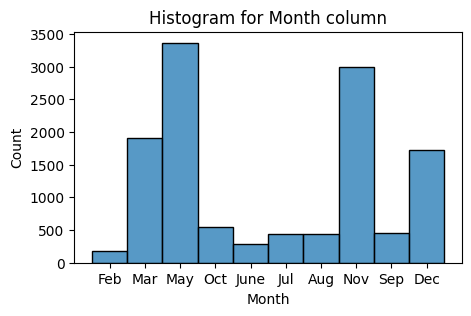

col: VisitorType -> type: object


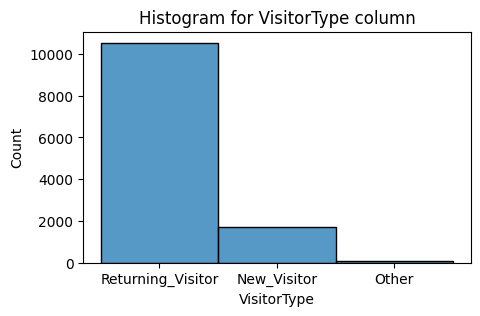

col: Weekend -> type: bool


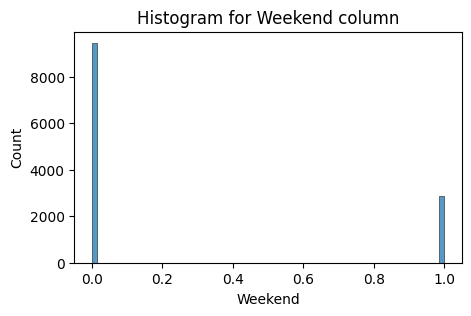

col: Revenue -> type: bool


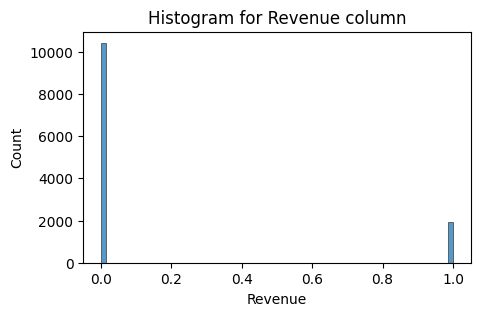

In [5]:
for col in dataset.columns:
    if(not np.issubdtype(dataset[col].dtype, np.number)):
        print(f"col: {col} -> type: {dataset[col].dtype}")
        plt.figure(figsize=(5, 3))
        plt.title(f"Histogram for {col} column")
        sns.histplot(x=col, data=dataset, bins=70)
        plt.show()
        # dataset[col].value_counts().plot(kind='hist', bins=70, figsize=(5, 3), color='blue')

Attribute Administrative with P-value <= 0.05 has coefficient 0.1389170941506722
Attribute Administrative_Duration with P-value <= 0.05 has coefficient 0.09358671905704195


Attribute Informational with P-value <= 0.05 has coefficient 0.09520034257205715
Attribute Informational_Duration with P-value <= 0.05 has coefficient 0.07034450234598343
Attribute ProductRelated with P-value <= 0.05 has coefficient 0.15853798428087473
Attribute ProductRelated_Duration with P-value <= 0.05 has coefficient 0.1523726105570103
Attribute BounceRates with P-value <= 0.05 has coefficient -0.1506729119260539
Attribute ExitRates with P-value <= 0.05 has coefficient -0.20707108205527175
Attribute PageValues with P-value <= 0.05 has coefficient 0.49256929525120746
Attribute SpecialDay with P-value <= 0.05 has coefficient -0.08230459817953263
Attribute Browser with P-value <= 0.05 has coefficient 0.023984289404092914
╒═════════════════════════╤═══════════════╤══════════════╕
│       Column name       │  Coefficient  │   P-value    │
╞═════════════════════════╪═══════════════╪══════════════╡
│     Administrative      │   0.138917    │ 3.51976e-54  │
├─────────────────────────┼────

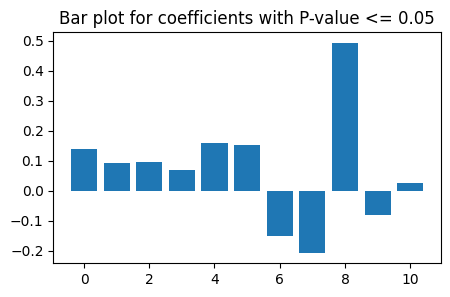

In [6]:
headers = ["Column name", "Coefficient", "P-value"]
data = []
coefs = []
for col in dataset.columns:
    if(np.issubdtype(dataset[col].dtype, np.number)):
        coef, p = stats.pointbiserialr(dataset[col], dataset['Revenue'])
        data.append([col, coef, p]) 
        if(p <= 0.05):
            print(f"Attribute {col} with P-value <= 0.05 has coefficient {coef}")
            coefs.append(coef)

table = tabulate(data, headers, tablefmt="fancy_grid", colalign=("center", "center", "center"))
print(table)

plt.figure(figsize=(5, 3))
plt.title("Bar plot for coefficients with P-value <= 0.05")
plt.bar([i for i in range(len(coefs))], coefs)
plt.show()

Attribute Month with P-value <= 0.05 has coefficient 7.536145352193617
Attribute Weekend with P-value <= 0.05 has coefficient 10.58183514829754
╒═══════════════╤═══════════════╤════════════╕
│  Column name  │  Coefficient  │  P-value   │
╞═══════════════╪═══════════════╪════════════╡
│     Month     │    7.53615    │ 0.0230965  │
├───────────────┼───────────────┼────────────┤
│  VisitorType  │    1.61638    │  0.445664  │
├───────────────┼───────────────┼────────────┤
│    Weekend    │    10.5818    │ 0.00503714 │
╘═══════════════╧═══════════════╧════════════╛


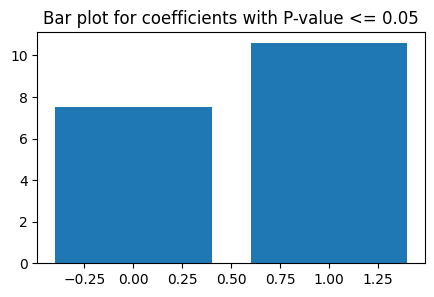

In [7]:
headers = ["Column name", "Coefficient", "P-value"]
data = []
coefs = []
for col in dataset.columns:
    if(not np.issubdtype(dataset[col].dtype, np.number)):
        if col != 'Revenue':
            chisqt = pd.crosstab(dataset[col], dataset['Revenue'], margins=True)
            value = np.array([chisqt.iloc[0][0:5].values,
                            chisqt.iloc[1][0:5].values])
            coef, p, dof = chi2_contingency(value)[0:3]
            data.append([col, coef, p])
            if(p <= 0.05):
                print(f"Attribute {col} with P-value <= 0.05 has coefficient {coef}")
                coefs.append(coef)

table = tabulate(data, headers, tablefmt="fancy_grid", colalign=("center", "center", "center"))
print(table)

plt.figure(figsize=(5, 3))
plt.title("Bar plot for coefficients with P-value <= 0.05")
plt.bar([i for i in range(len(coefs))], coefs)
plt.show()

In [94]:
def process_data(sc):
    df = pd.DataFrame(dataset)
    scaler = sc

    for col in df.columns:
        if(not np.issubdtype(df[col].dtype, np.number)):
            df[col] = LabelEncoder().fit_transform(df[col])
        if(df[col].describe().loc['std'] > 40):
            df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))
            
    X = df.iloc[:, :-1].values
    T = df.iloc[:, -1].values

    # print(df.describe())
    # print(X)
    # print(T)
    return X, T

In [95]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Expresia pentru Negative Log Likelihood - functia J(w)
def nll(Y, T):
    return -np.sum(T * np.log(Y) + (1 - T) * np.log(1.0 - Y))

# Expresia care intoarce acuratetea clasificarii
def accuracy(Y, T):
    return np.mean(np.round(Y) == T)

In [97]:
def train_logistic(X, T, lr=.01, epochs_no=100):
    # Antrenati modelul logistic (ponderile W), executand epochs_no pasi din algoritmul de gradient descent
    (N, D) = X.shape
    X_hat = np.concatenate([X, np.ones((N, 1))], axis=1)
    W = np.random.randn(D + 1)

    for _ in range(epochs_no):
        Y = logistic(np.dot(X_hat, W))
        W -= lr * np.dot(np.transpose(X_hat), Y - T)
    return W

def predict_logistic(X, W):
    # Calculati predictia Y a modelului logistic antrenat (ponderile W invatate)
    (N, D) = X.shape
    X_hat = np.concatenate([X, np.ones((N, 1))], axis=1)
    Y = logistic(np.dot(X_hat, W))
    return Y

In [116]:
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]
for sc in scalers:
    print(sc.__class__.__name__)
    X, T = process_data(sc)
    X_train, X_test, y_train, y_test = train_test_split(X, T, test_size=0.20, random_state=True)
    
    W = train_logistic(X_train, y_train, lr=.1, epochs_no=1000)
    Y = predict_logistic(X_train, W)
    # print(W)
    print(f"Acuratetea pe datele de train - logistic regression manual - {accuracy(Y, y_train)}")
    
    W = train_logistic(X_test, y_test, lr=.1, epochs_no=1000)
    Y = predict_logistic(X_test, W)
    # print(W)
    print(f"Acuratetea pe datele de test - logistic regression manual - {accuracy(Y, y_test)}")
    
    print(f"Precision {precision_score(y_test, np.round(Y))}")
    print(f"Recall {recall_score(y_test, np.round(Y))}")
    print(f"F1-score {f1_score(y_test, np.round(Y))}")
    
    logistic_clf = LogisticRegression(random_state=True, max_iter=1000)
    logistic_clf.fit(X_train, y_train)
    Y = logistic_clf.predict(X_train)
    print(f"Acuratetea pe datele de train - logistic regression biblioteca - {accuracy(Y, y_train)}")
    
    logistic_clf = LogisticRegression(random_state=True, max_iter=1000)
    logistic_clf.fit(X_test, y_test)
    Y = logistic_clf.predict(X_test)
    print(f"Acuratetea pe datele de test - logistic regression biblioteca - {accuracy(Y, y_test)}")
    print(f"Precision {precision_score(y_test, np.round(Y))}")
    print(f"Recall {recall_score(y_test, np.round(Y))}")
    print(f"F1-score {f1_score(y_test, np.round(Y))}")
    
    # print("Confusion matrix - logistic regression biblioteca")
    # print(pd.crosstab(y_test, logistic_clf.predict(X_test), rownames=['Actual'], colnames=['Predicted']))
    # print("Confusion matrix - logistic regression manual")
    # print(pd.crosstab(y_test, np.round(predict_logistic(X_test, W)), rownames=['Actual'], colnames=['Predicted']))

MinMaxScaler


/tmp/ipykernel_158/913713565.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Acuratetea pe datele de train - logistic regression manual - 0.8829075425790754
Acuratetea pe datele de test - logistic regression manual - 0.8969991889699919
Precision 0.7046413502109705
Recall 0.4757834757834758
F1-score 0.5680272108843538
Acuratetea pe datele de train - logistic regression biblioteca - 0.8820965125709651
Acuratetea pe datele de test - logistic regression biblioteca - 0.8888888888888888
Precision 0.72
Recall 0.358974358974359
F1-score 0.4790874524714829
StandardScaler


/tmp/ipykernel_158/913713565.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Acuratetea pe datele de train - logistic regression manual - 0.8829075425790754
Acuratetea pe datele de test - logistic regression manual - 0.8442822384428224
Precision 0.4689265536723164
Recall 0.7094017094017094
F1-score 0.5646258503401361
Acuratetea pe datele de train - logistic regression biblioteca - 0.8820965125709651
Acuratetea pe datele de test - logistic regression biblioteca - 0.8888888888888888
Precision 0.72
Recall 0.358974358974359
F1-score 0.4790874524714829
RobustScaler


/tmp/ipykernel_158/913713565.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Acuratetea pe datele de train - logistic regression manual - 0.8904095701540957
Acuratetea pe datele de test - logistic regression manual - 0.8905109489051095
Precision 0.7425149700598802
Recall 0.35327635327635326
F1-score 0.4787644787644787
Acuratetea pe datele de train - logistic regression biblioteca - 0.8820965125709651
Acuratetea pe datele de test - logistic regression biblioteca - 0.8888888888888888
Precision 0.72
Recall 0.358974358974359
F1-score 0.4790874524714829


In [118]:
CLASS = "CLASS"

# Adâncimea arborilor
D = 3 #@param {type: "slider", min: 2, max: 10}

# Procentul de exemple din setul de date utilizat la construcția arborilor
P = 50 #@param {type: "slider", min: 1, max: 100}

In [158]:
class Node:
    """ Representation for a node from the decision tree """
    def __init__(self, label):
        """
            for non-leafs it is the name of the attribute
            for leafs it is the class
        """
        self.label = label
        
        # Dictionary of (attribute value, nodes)
        self.children = {}
    
    def display(self, indent = ""):
        print(indent + (str(self.label) + ":" if self.children else "<" + str(self.label) + ">"))
        indent += "   "
        if self.children:
            for key, value in self.children.items():
                print(indent + ":" + str(key))
                value.display(indent + "   ")

In [164]:
def evaluate(tree, example):
    '''
    Functia intoarce clasa prezisa de arborele `tree` pentru exemplul `example`
    '''
    # TODO 2d
    if not tree.children:
        return tree.label
    else:
        return evaluate(tree.children[example[tree.label]], example)
    
def precision(tree, X, c):
    prec = 0
    predicted_ct = 0
    
    for ex in X:
        pred_c = evaluate(tree, ex)
        if pred_c == c:
            predicted_ct += 1
            if ex['CLASS'] ==c:
                prec += 1
    
    if predicted_ct != 0:
        return prec / predicted_ct
    return 0
    

def recall(tree, X, c):
    X_c = [x for x in X if x['CLASS'] == c]
    recall = len(list([x for x in X_c if evaluate(tree, x) == c]))
    recall /= len(X_c)
    return recall
    
def accuracy(tree, X):
    count = len(list(x for x in X if evaluate(tree, x) == x['CLASS']))
    return 1.0 * count / len(X)

In [169]:
def mostFrequentClass(X):
    classCount = {}
    for x in X:
        if x["CLASS"] not in classCount:
            classCount[x["CLASS"]] = 1
        else:
            classCount[x["CLASS"]] += 1
    return max(classCount, key=classCount.get)

def randomTree(d, X, A):
    """
    Args:
        d: maximum depth
        X: a list of examples
        A: the list of attribute names
    """
    if d == 0:
        return Node(mostFrequentClass(X))
    else:
        ai = random.choice(A)
        Anew = A.copy()
        Anew.remove(ai)
        node = Node(ai)
        for vj in set([x[ai] for x in X]):
            Xij = [x for x in X if x[ai] == vj]
            node.children[vj] = randomTree(d-1, Xij, Anew)
        return node

## pentru datasets/car, pentru d = 5, ar trebui să existe și unele frunze care nu sunt etichetate cu "unacc"
# verificați pentru d mai mare decât numărul de atribute
attributes = []
for a in dataset.columns:
    attributes.append(a)
attributes = attributes[:-1]
print(attributes)

examples = []
classes = set()
i=0
for row in X:
    atr = row
    label = T[i]
    i+=1
    classes.add(label)
    example = dict(zip(attributes, atr))
    example[CLASS] = label
    examples.append(example)
    
print(examples[0])
cls = list(classes)[0]

scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]
for sc in scalers:
    print(sc.__class__.__name__)
    X, T = process_data(sc)
    X_train, X_test, y_train, y_test = train_test_split(X, T, test_size=0.20, random_state=True)

    # print("Tree:")
    rtree = randomTree(5, examples, attributes)
    
    print("Accuracy, precision, recall, for random, class", cls, ":", round(accuracy(rtree, examples), 3), 
        round(precision(rtree, examples, cls), 3), round(recall(rtree, examples, cls), 3))
    
    decision_tree_clf = DecisionTreeClassifier(random_state=True)
    decision_tree_clf.fit(X_train, y_train)
    Y = decision_tree_clf.predict(X_test)
    print(f"Precision {precision_score(y_test, np.round(Y))}")
    print(f"Recall {recall_score(y_test, np.round(Y))}")
    print(f"F1-score {f1_score(y_test, np.round(Y))}")

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
{'Administrative': 0.0, 'Administrative_Duration': 0.0, 'Informational': 0.0, 'Informational_Duration': 0.0, 'ProductRelated': 0.0014184397163120568, 'ProductRelated_Duration': 0.0, 'BounceRates': 0.2, 'ExitRates': 0.2, 'PageValues': 0.0, 'SpecialDay': 0.0, 'Month': 2.0, 'OperatingSystems': 1.0, 'Browser': 1.0, 'Region': 1.0, 'TrafficType': 1.0, 'VisitorType': 2.0, 'Weekend': 0.0, 'CLASS': 0}
MinMaxScaler
Accuracy, precision, recall, for random, class 0 : 0.999 0.999 1.0
Precision 0.5013054830287206
Recall 0.5470085470085471
F1-score 0.5231607629427792
StandardScaler
Accuracy, precision, recall, for random, class 0 : 0.999 0.998 1.0
Precision 0.5013054830287206
Recall 0.5470085470085471
F1-score 0.523160762942